In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from scipy.stats import poisson
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Mall_Customers.csv')

In [ ]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df = df.rename(columns={'Genre':'Gender'})

In [ ]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
# Finding whether there are missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.mean()

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [ ]:
hist(Spending Score (1-100),
    main="HistoGram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

SyntaxError: ignored

In [ ]:
feature = df.drop(columns='CustomerID')

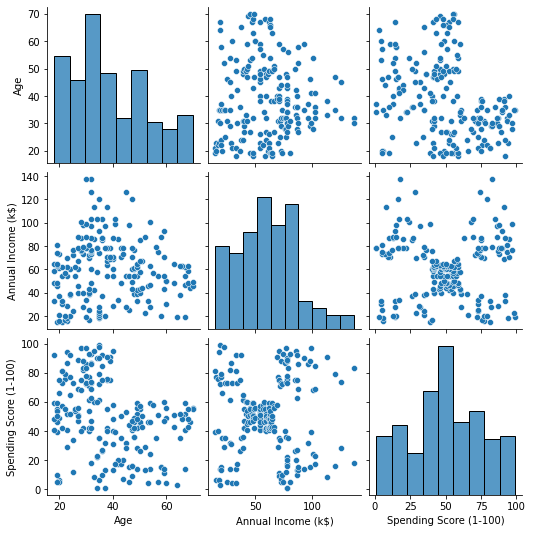

In [ ]:
sns.pairplot(feature,kind="scatter")

([<matplotlib.patches.Wedge at 0x7f7fc4bb0250>,
 [Text(-0.22485758633183295, 1.1787446991902115, 'Female'),
  Text(0.2248575863318331, -1.1787446991902115, 'Male')])

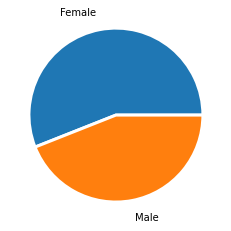

In [ ]:
# Ratio of male and female
gender_count = df['Gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, labeldistance=1.2, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

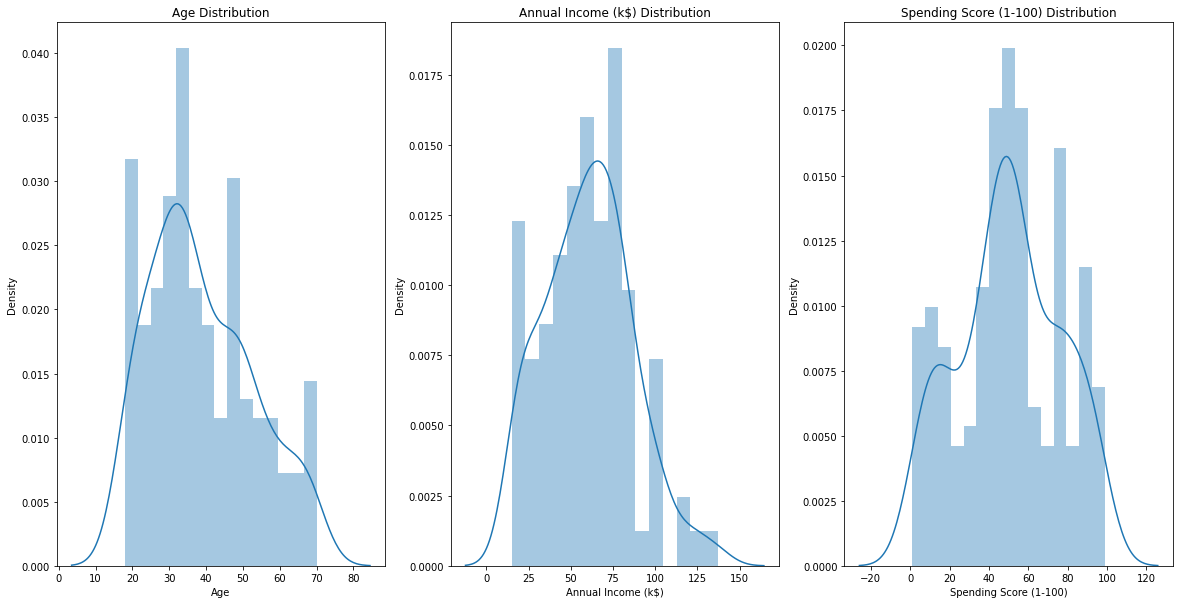

In [ ]:
plt.figure(figsize = (20 , 10))
n=1
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.distplot(df[x], bins = 15)
    plt.title('{} Distribution'.format(x))
    n+=1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Turn non-numeric feature into number
# Male=0, Female=1
feature.loc[feature['Gender']=='Male','Gender']=0
feature.loc[feature['Gender']=='Female','Gender']=1

NameError: ignored

In [ ]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(feature)
    inertias.append(km.inertia_)

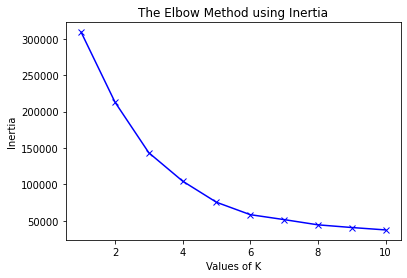

In [ ]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
inertias

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51575.27793107793,
 44392.11566567935,
 40699.84523062437,
 37404.73842940685]

Text(0.5, 1.0, 'Customer segmentation by 3 groups')

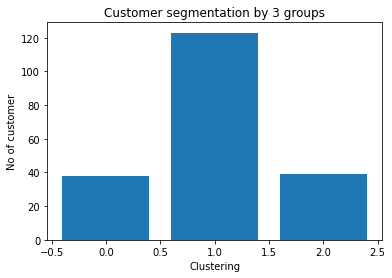

In [ ]:
# 3 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=3).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 3 groups')

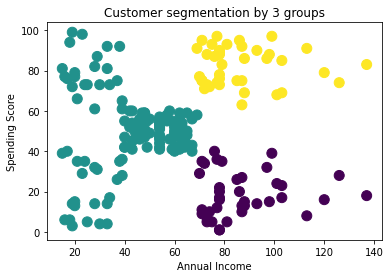

In [ ]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 3 groups')

plt.show()

Text(0.5, 1.0, 'Customer segmentation by 4 groups')

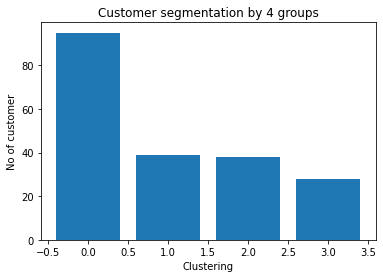

In [ ]:
# 4 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=4).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 4 groups')

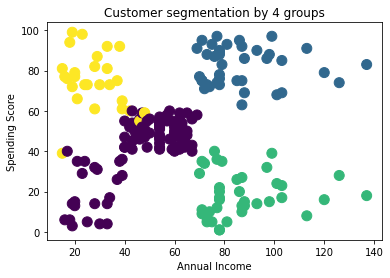

In [ ]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 4 groups')

plt.show()

Text(0.5, 1.0, 'Customer segmentation by 5 groups')

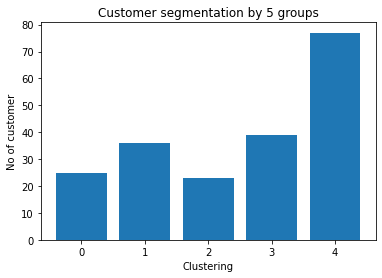

In [ ]:
# 5 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=5).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 5 groups')


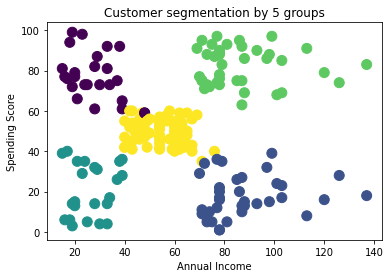

In [ ]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 5 groups')

plt.show()

In [ ]:
from scipy.stats import spearmanr
FirstSample = df[1:30]['Spending Score (1-100)']
SecondSample = df[1:30]['Annual Income (k$)']
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=-0.029, p=0.880402
independent samples


In [ ]:
#pearson correlation
from scipy.stats import pearsonr
FirstSample = df[1:30]['Spending Score (1-100)']
SecondSample = df[1:30]['Annual Income (k$)']
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=-0.021, p=0.913061
independent samples


In [ ]:
df[1:30].corr(method="pearson")

NameError: ignored

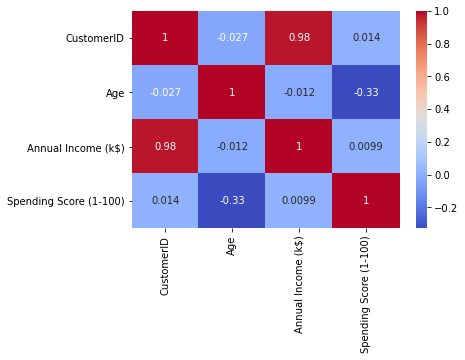

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
df.columns = ['CustomerID','Gender', 'Age','Annual_Income(k$)', 'Spending_Score']

In [ ]:
print('Use df.values property to get NumPy array')
vals = df.Spending_Score
print(vals)
t=vals.mean()
print("mean_percentage:",t)

Use df.values property to get NumPy array
0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending_Score, Length: 200, dtype: int64
mean_percentage: 50.2


In [ ]:
s=vals.tolist()
print(s)

[39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98, 35, 73, 5, 73, 14, 82, 32, 61, 31, 87, 4, 73, 4, 92, 14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75, 9, 75, 34, 71, 5, 88, 7, 73, 10, 72, 5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20, 76, 16, 89, 1, 78, 1, 73, 35, 83, 5, 93, 26, 75, 20, 95, 27, 63, 13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24, 68, 17, 85, 23, 69, 8, 91, 16, 79, 28, 74, 18, 83]


In [ ]:
# z-test
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['Spending_Score'], x2=None, value=t)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0
accept null hypothesis


In [ ]:
#t-test
from scipy.stats import ttest_1samp
import numpy as np
Percentage=s
print(Percentage)
Percentage_mean = np.mean(Percentage)
print("mean_percentages:",Percentage_mean)
tset, pval = ttest_1samp(Percentage, 60)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98, 35, 73, 5, 73, 14, 82, 32, 61, 31, 87, 4, 73, 4, 92, 14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75, 9, 75, 34, 71, 5, 88, 7, 73, 10, 72, 5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20, 76, 16, 89, 1, 78, 1, 73, 35, 83, 5, 93, 26, 75, 20, 95, 27, 63, 13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24, 68, 17, 85, 23, 69, 8, 91, 16, 79, 28, 74, 18, 83]
mean_percentages: 50.2
p-values 2.2168618419828096e-07
 we are rejecting null hypothesis


In [ ]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['yellow', 'salmon']
explode = [0, 0.1]
 
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, 
        labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()